In [ ]:
import pandas as pd
import sys

df = pd.read_csv(r'C:\Users\user\OneDrive\INNIO Rashmi\assessment - Data Analytics - INNIO.csv', sep=',', encoding='utf-8') #Replace with your file path

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   oph                       316 non-null    int64  
 1   pist_m                    314 non-null    float64
 2   issue_type                314 non-null    object 
 3   bmep                      314 non-null    float64
 4   ng_imp                    314 non-null    float64
 5   past_dmg                  314 non-null    float64
 6   resting_analysis_results  314 non-null    float64
 7   rpm_max                   314 non-null    float64
 8   full_load_issues          314 non-null    float64
 9   number_up                 314 non-null    float64
 10  number_tc                 314 non-null    float64
 11  op_set_1                  314 non-null    float64
 12  op_set_2                  0 non-null      float64
 13  op_set_3                  314 non-null    float64
 14  high_break

In [7]:
# Remove columns with all NaN values
df.dropna(axis=1, how='all', inplace=True)

In [8]:
# Remove rows with NaN values in specific columns
df.dropna(subset=['oph','pist_m','bmep','high_breakdown_risk'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 0 to 315
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   oph                       314 non-null    int64  
 1   pist_m                    314 non-null    float64
 2   issue_type                314 non-null    object 
 3   bmep                      314 non-null    float64
 4   ng_imp                    314 non-null    float64
 5   past_dmg                  314 non-null    float64
 6   resting_analysis_results  314 non-null    float64
 7   rpm_max                   314 non-null    float64
 8   full_load_issues          314 non-null    float64
 9   number_up                 314 non-null    float64
 10  number_tc                 314 non-null    float64
 11  op_set_1                  314 non-null    float64
 12  op_set_3                  314 non-null    float64
 13  high_breakdown_risk       314 non-null    float64
dtypes: float64(12),

In [10]:
# Remove duplicate rows
from tabulate import tabulate

duplicates = df[df.duplicated(keep=False)]
print("Duplicates removed:")
if not duplicates.empty:
    print(tabulate(duplicates, headers='keys', tablefmt='psql', showindex=False))
else:
    print("No duplicates found.")
df2 = df.drop_duplicates()
num_duplicates = df.shape[0] - df2.shape[0]
print(f"Number of duplicates dropped: {num_duplicates}")

Duplicates removed:
+-------+----------+-----------------+--------+----------+------------+----------------------------+-----------+--------------------+-------------+-------------+------------+------------+-----------------------+
|   oph |   pist_m | issue_type      |   bmep |   ng_imp |   past_dmg |   resting_analysis_results |   rpm_max |   full_load_issues |   number_up |   number_tc |   op_set_1 |   op_set_3 |   high_breakdown_risk |
|-------+----------+-----------------+--------+----------+------------+----------------------------+-----------+--------------------+-------------+-------------+------------+------------+-----------------------|
| 69000 |        0 | non-symptomatic |    140 |      478 |          0 |                          1 |      1510 |                  0 |          18 |           2 |          1 |          0 |                     1 |
| 69000 |        0 | non-symptomatic |    140 |      478 |          0 |                          1 |      1510 |                  0 

In [11]:
# Convert 'oph' to years and round to nearest integer safely
df2 = df2.copy()
df2.loc[:, 'oph_years'] = (df2['oph'] / (24*365.25)).round(1).astype(float)

In [12]:
# Print a sample of the original 'oph' values and their converted 'oph_years' values
sample = df2[['oph', 'oph_years']].head(10)
print("Sample conversion of 'oph' to 'oph_years':")
print(sample)

Sample conversion of 'oph' to 'oph_years':
     oph  oph_years
0  63000        7.2
1  37000        4.2
2  41000        4.7
3  56000        6.4
4  57000        6.5
5  57000        6.5
6  56000        6.4
7  44000        5.0
8  52000        5.9
9  57000        6.5


In [13]:
df2.head()

,oph,pist_m,issue_type,bmep,ng_imp,past_dmg,resting_analysis_results,rpm_max,full_load_issues,number_up,number_tc,op_set_1,op_set_3,high_breakdown_risk,oph_years
0,63000,1.0,non-symptomatic,145.0,466.0,1.0,0.0,1500.0,0.0,23.0,0.0,1.0,0.0,1.0,7.2
1,37000,1.0,non-related,130.0,500.0,0.0,1.0,1870.0,0.0,35.0,0.0,1.0,0.0,1.0,4.2
2,41000,0.0,atypical,130.0,408.0,0.0,0.0,1720.0,0.0,14.0,2.0,1.0,0.0,1.0,4.7
3,56000,1.0,atypical,120.0,472.0,0.0,1.0,1780.0,0.0,8.0,2.0,1.0,0.0,1.0,6.4
4,57000,0.0,typical,120.0,708.0,0.0,1.0,1630.0,1.0,6.0,2.0,1.0,0.0,1.0,6.5


In [14]:
# Check for outliers in 'oph_years'
outliers = df2[(df2['oph_years'] <= 0) | (df2['oph_years'] >= 50)]
print("Outliers in 'oph_years' (<=0 or >=50):")
if not outliers.empty:
    print(tabulate(outliers, headers='keys', tablefmt='psql', showindex=False))
else:
    print("No outliers found.")

# Then filter them out
df3 = df2[(df2['oph_years'] > 0) & (df2['oph_years'] < 50)]

#

Outliers in 'oph_years' (<=0 or >=50):
+------------+----------+--------------+--------+----------+------------+----------------------------+-----------+--------------------+-------------+-------------+------------+------------+-----------------------+-------------+
|        oph |   pist_m | issue_type   |   bmep |   ng_imp |   past_dmg |   resting_analysis_results |   rpm_max |   full_load_issues |   number_up |   number_tc |   op_set_1 |   op_set_3 |   high_breakdown_risk |   oph_years |
|------------+----------+--------------+--------+----------+------------+----------------------------+-----------+--------------------+-------------+-------------+------------+------------+-----------------------+-------------|
| 1000000000 |        1 | typical      |    138 |      542 |          0 |                          0 |      1820 |                  0 |           0 |           2 |          1 |          0 |                     0 |      114077 |
+------------+----------+--------------+--------+

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 315
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   oph                       302 non-null    int64  
 1   pist_m                    302 non-null    float64
 2   issue_type                302 non-null    object 
 3   bmep                      302 non-null    float64
 4   ng_imp                    302 non-null    float64
 5   past_dmg                  302 non-null    float64
 6   resting_analysis_results  302 non-null    float64
 7   rpm_max                   302 non-null    float64
 8   full_load_issues          302 non-null    float64
 9   number_up                 302 non-null    float64
 10  number_tc                 302 non-null    float64
 11  op_set_1                  302 non-null    float64
 12  op_set_3                  302 non-null    float64
 13  high_breakdown_risk       302 non-null    float64
 14  oph_years      

In [16]:
df3.head()

,oph,pist_m,issue_type,bmep,ng_imp,past_dmg,resting_analysis_results,rpm_max,full_load_issues,number_up,number_tc,op_set_1,op_set_3,high_breakdown_risk,oph_years
0,63000,1.0,non-symptomatic,145.0,466.0,1.0,0.0,1500.0,0.0,23.0,0.0,1.0,0.0,1.0,7.2
1,37000,1.0,non-related,130.0,500.0,0.0,1.0,1870.0,0.0,35.0,0.0,1.0,0.0,1.0,4.2
2,41000,0.0,atypical,130.0,408.0,0.0,0.0,1720.0,0.0,14.0,2.0,1.0,0.0,1.0,4.7
3,56000,1.0,atypical,120.0,472.0,0.0,1.0,1780.0,0.0,8.0,2.0,1.0,0.0,1.0,6.4
4,57000,0.0,typical,120.0,708.0,0.0,1.0,1630.0,1.0,6.0,2.0,1.0,0.0,1.0,6.5


In [17]:
percentage = (df3['high_breakdown_risk'] == 1).mean() * 100
count = (df3['high_breakdown_risk'] == 1).sum()
avgr = df3['rpm_max'].mean()
avgf = df3['full_load_issues'].mean()* 100
sumt = df3['number_tc'].sum()
print(f"Percentage of Engines with high_breakdown_risk = {percentage:.2f}%")
print(f"Count of Engines with high_breakdown_risk = {count:}")
print(f"Average rpm_max for Engines= {avgr:.0f}")
print(f"Percentage of full_load_issues for Engines= {avgf:.1f}")
print(f"Total number of TC for Engines= {sumt:.0f}")


Percentage of Engines with high_breakdown_risk = 54.30%
Count of Engines with high_breakdown_risk = 164
Average rpm_max for Engines= 1496
Percentage of full_load_issues for Engines= 32.8
Total number of TC for Engines= 422


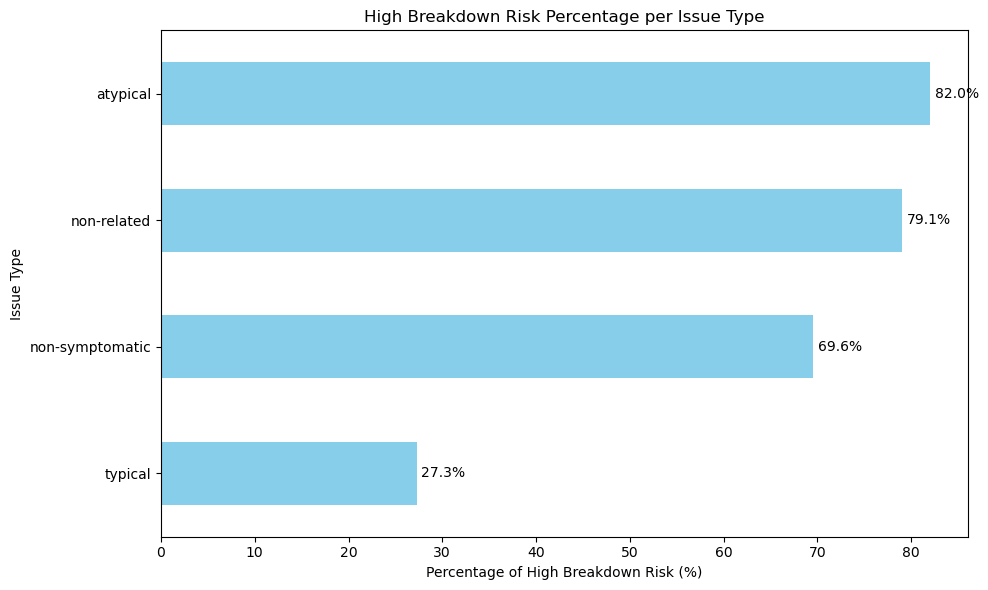

In [18]:
import matplotlib.pyplot as plt

# Filter only rows where high_breakdown_risk == 1
high_risk = df3[df3['high_breakdown_risk'] == 1]

# Count of each issue_type where high_breakdown_risk == 1
issue_counts = high_risk['issue_type'].value_counts()

# Count of each issue_type in the whole dataset
total_issue_counts = df3['issue_type'].value_counts()

# Calculate percentage for each issue_type: (high risk count / total count) * 100
issue_percent = (issue_counts / total_issue_counts.loc[issue_counts.index]) * 100

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
ax = issue_percent.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of High Breakdown Risk (%)')
plt.ylabel('Issue Type')
plt.title('High Breakdown Risk Percentage per Issue Type')

# Display percentage over the bars
for i, v in enumerate(issue_percent.sort_values()):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.show()